## 볼린저 밴드(Bollinger Bands)
볼린저 밴드는 1980년대 초 존 볼린저(John Bollinger)가 개발한 기술적 분석 지표입니다. 주가의 변동성이 상대적으로 높은지 낮은지를 판단하고, 주가가 과매수 또는 과매도 상태에 있는지 파악하는 데 유용하게 사용됩니다.
* 중심선 (Middle Band): 주가의 이동평균선(SMA, Simple Moving Average)입니다. 보통 20일 이동평균선을 사용합니다.
* 상단선 (Upper Band): 중심선에 표준편차(Standard Deviation)의 2배를 더한 값입니다.
* 하단선 (Lower Band): 중심선에서 표준편차의 2배를 뺀 값입니다.

In [14]:
import FinanceDataReader as fdr
df = fdr.DataReader("005930")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-04-16,30100,30640,30020,30560,371037,NaN
2013-04-17,31320,31320,30280,30360,209822,-0.006545
2013-04-18,30400,30440,29619,29660,267168,-0.023057
2013-04-19,29299,29839,29100,29500,314080,-0.005394
2013-04-22,29800,30059,29299,30060,186717,0.018983
...,...,...,...,...,...,...
2025-06-30,61200,61200,59800,59800,17110294,-0.016447
2025-07-01,60400,61100,60200,60200,13650991,0.006689
2025-07-02,60200,60900,59800,60800,15047951,0.009967


In [15]:
# 볼린저 밴드 계산
window_size = 20  # 보통 20일을 기준으로 설정
std_multiplier = 2 # 표준편차 배수, 보통 2를 사용

In [16]:
# 중심선 (20일 이동평균)
df['MiddleBand'] = df['Close'].rolling(window=window_size).mean()

# 표준편차
df['StdDev'] = df['Close'].rolling(window=window_size).std()

# 상단선
df['UpperBand'] = df['MiddleBand'] + (df['StdDev'] * std_multiplier)

# 하단선
df['LowerBand'] = df['MiddleBand'] - (df['StdDev'] * std_multiplier)

df

,Open,High,Low,Close,Volume,Change,MiddleBand,StdDev,UpperBand,LowerBand
Date,,,,,,,,,,
2013-04-16,30100,30640,30020,30560,371037,NaN,NaN,NaN,NaN,NaN
2013-04-17,31320,31320,30280,30360,209822,-0.006545,NaN,NaN,NaN,NaN
2013-04-18,30400,30440,29619,29660,267168,-0.023057,NaN,NaN,NaN,NaN
2013-04-19,29299,29839,29100,29500,314080,-0.005394,NaN,NaN,NaN,NaN
2013-04-22,29800,30059,29299,30060,186717,0.018983,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-30,61200,61200,59800,59800,17110294,-0.016447,59050.0,1360.147051,61770.294102,56329.705898
2025-07-01,60400,61100,60200,60200,13650991,0.006689,59250.0,1204.159458,61658.318916,56841.681084
2025-07-02,60200,60900,59800,60800,15047951,0.009967,59450.0,1103.821114,61657.642229,57242.357771


In [17]:
df = df[df.index.year >= 2025]

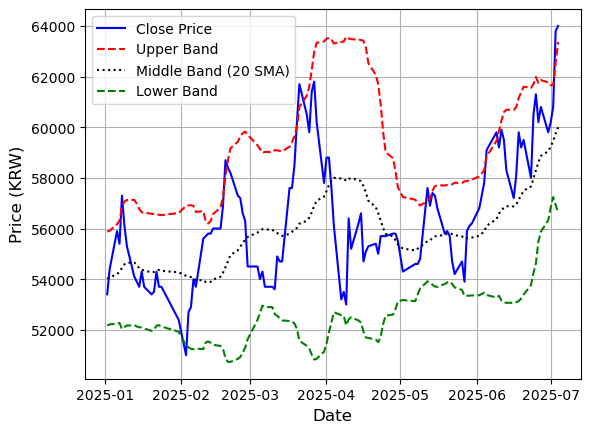

In [18]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'], color='b', label='Close Price')
plt.plot(df.index, df['UpperBand'], color='r', linestyle='--', label='Upper Band')
plt.plot(df.index, df['MiddleBand'], color='k', linestyle=':', label='Middle Band (20 SMA)')
plt.plot(df.index, df['LowerBand'], color='g', linestyle='--', label='Lower Band')

# 차트 제목 및 라벨 설정
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (KRW)', fontsize=12)
plt.legend()

plt.grid()
plt.show()

In [19]:
def get_bollinger_bands(df, window=20, k=2):

    # 중심선 (이동평균) 계산
    df['middle'] = df['Close'].rolling(window=window).mean()

    # 표준편차 계산
    std_dev = df['Close'].rolling(window=window).std()

    # 상단 밴드와 하단 밴드 계산
    df['upper'] = df['middle'] + k * std_dev
    df['lower'] = df['middle'] - k * std_dev

    return df

In [20]:
df = fdr.DataReader("AAPL")
df = get_bollinger_bands(df)
df

,Open,High,Low,Close,Volume,Adj Close,middle,upper,lower
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091309,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-27,201.889999,203.220001,200.000000,201.080002,73188600,201.080002,200.4410,205.011760,195.870241
2025-06-30,202.009995,207.389999,199.259995,205.169998,91912800,205.169998,200.6570,205.693692,195.620308
2025-07-01,206.669998,210.190002,206.139999,207.820007,78788900,207.820007,200.9630,206.925115,195.000886
2025-07-02,208.910004,213.339996,208.139999,212.440002,67941800,212.440002,201.4215,209.249147,193.593854


In [21]:
import numpy as np

def get_bollinger_band_position(df, window=20, k=2):

    # 볼린저 밴드 계산
    df['middle'] = df['Close'].rolling(window=window).mean()
    df['upper'] = df['middle'] + k * df['Close'].rolling(window=window).std()
    df['lower'] = df['middle'] - k * df['Close'].rolling(window=window).std()

    # 조건 목록 설정
    conditions = [
        df['Close'] > df['upper'],   # 4: 상단 밴드 초과
        df['Close'] > df['middle'],  # 3: 중심선 초과 (상단 밴드 이하)
        df['Close'] > df['lower'],   # 2: 하단 밴드 초과 (중심선 이하)
    ]

    # 각 조건에 해당하는 값 목록
    choices = [4, 3, 2]

    # np.select를 사용하여 'bb_pos' 컬럼 생성
    # conditions를 순서대로 확인하며, True인 경우 choices의 값을 대입합니다.
    # 모든 조건이 False인 경우 default 값인 1이 대입됩니다.
    df['bb_pos'] = np.select(conditions, choices, default=1)
    
    # 볼린저 밴드가 계산되지 않은 초기 NaN 값들은 0으로 처리
    df['bb_pos'] = df['bb_pos'].fillna(0)
    df['bb_pos'] = df['bb_pos'].astype(int)

    return df

In [22]:
df = fdr.DataReader("AAPL")
df = get_bollinger_band_position(df)
df.dropna()

,Open,High,Low,Close,Volume,Adj Close,middle,upper,lower,bb_pos
1981-01-12,0.142299,0.142299,0.141183,0.141183,23699200,0.108456,0.138588,0.167874,0.109302,3
1981-01-13,0.136719,0.136719,0.136161,0.136161,23049600,0.104599,0.138979,0.167896,0.110062,2
1981-01-14,0.136719,0.137277,0.136719,0.136719,14291200,0.105027,0.139732,0.167511,0.111953,2
1981-01-15,0.139509,0.140625,0.139509,0.139509,14067200,0.107170,0.141071,0.165781,0.116362,2
1981-01-16,0.138951,0.138951,0.138393,0.138393,13395200,0.106313,0.142215,0.163873,0.120558,2
...,...,...,...,...,...,...,...,...,...,...
2025-06-27,201.889999,203.220001,200.000000,201.080002,73188600,201.080002,200.441000,205.011760,195.870241,3
2025-06-30,202.009995,207.389999,199.259995,205.169998,91912800,205.169998,200.657000,205.693692,195.620308,3
2025-07-01,206.669998,210.190002,206.139999,207.820007,78788900,207.820007,200.963000,206.925115,195.000886,4
2025-07-02,208.910004,213.339996,208.139999,212.440002,67941800,212.440002,201.421500,209.249147,193.593854,4


* 백테스팅

In [23]:
import pandas as pd

def bollinger_bands_indicator(data_series, n=20, nsig=2):
    series = pd.Series(data_series)
    middle_band = series.rolling(window=n).mean()
    std_dev = series.rolling(window=n).std()
    upper_band = middle_band + (std_dev * nsig)
    lower_band = middle_band - (std_dev * nsig)
    return upper_band, middle_band, lower_band

In [24]:
from backtesting import Backtest, Strategy
import warnings
warnings.filterwarnings("ignore")

In [25]:
class BBandStrategy(Strategy):
    # 전략에 사용할 파라미터 (최적화 가능)
    bb_window = 20  # 볼린저밴드 기간
    bb_std = 2      # 볼린저밴드 표준편차 배수

    stop_loss_pct = 5.0 # 5% 손절매
    
    def init(self):
        # 종가(Close) 데이터를 사용하여 볼린저 밴드 지표를 계산
        # self.I()를 사용하면 backtesting.py가 알아서 지표를 관리하고 차트에 그려줍니다.
        self.upper_band, self.middle_band, self.lower_band = self.I(
            bollinger_bands_indicator, self.data.Close, self.bb_window, self.bb_std
        )

    def next(self):
        
        current_price = self.data.Close[-1]
        
        if self.data.Close[-1] < self.lower_band[-1] and not self.position:
            stop_loss_price = current_price * (1 - self.stop_loss_pct / 100)
            self.buy(sl=stop_loss_price)

        elif self.upper_band[-1] < self.data.Close[-1] and self.position:
            self.position.close() # 보유 포지션 매도

In [26]:
df = fdr.DataReader("005930")

bt = Backtest(
    df,           # 사용할 데이터
    BBandStrategy,  # 사용할 전략
    cash=10_000_000, # 초기 자본금 (천만원)
    commission=.002 # 수수료 (0.2%)
)

# 백테스팅 실행 및 결과 저장
stats = bt.run()
print(stats)

Backtest.run:   0%|          | 0/2980 [00:00<?, ?bar/s]

Start                     2013-04-16 00:00:00
End                       2025-07-04 00:00:00
Duration                   4462 days 00:00:00
Exposure Time [%]                    40.76667
Equity Final [$]                 12020124.232
Equity Peak [$]                  14081170.142
Commissions [$]                   2398461.768
Return [%]                           20.20124
Buy & Hold Return [%]               113.33333
Return (Ann.) [%]                     1.55758
Volatility (Ann.) [%]                16.59634
CAGR [%]                              1.04458
Sharpe Ratio                          0.09385
Sortino Ratio                         0.14464
Calmar Ratio                          0.04452
Alpha [%]                           -23.00128
Beta                                   0.3812
Max. Drawdown [%]                   -34.98729
Avg. Drawdown [%]                    -7.55388
Max. Drawdown Duration     1376 days 00:00:00
Avg. Drawdown Duration      169 days 00:00:00
# Trades                          

# 연습문제
1. '애플(AAPL)'의 2023년 1월 1일부터 현재까지의 주가 데이터를 불러오세요. 그 다음, 강의에서 배운 내용을 바탕으로 표준 설정(기간: 20일, 표준편차 배수: 2)에 따라 볼린저 밴드를 구성하는 MiddleBand, UpperBand, LowerBand 컬럼을 추가하고, 데이터프레임의 마지막 5개 행을 출력하세요.

In [2]:
import FinanceDataReader as fdr
import pandas as pd

df = fdr.DataReader("AAPL")
df = df[df.index.year >= 2023]

window = 20
std = 2

df["MiddleBand"] = df["Close"].rolling(window).mean() 
df["Std"] = df["Close"].rolling(window).std()

df["UpperBand"] = df["MiddleBand"] + df["Std"] * 2
df["LowerBand"] = df["MiddleBand"] - df["Std"] * 2
df

,Open,High,Low,Close,Volume,Adj Close,MiddleBand,Std,UpperBand,LowerBand
2023-01-03,130.279999,130.899994,124.169998,125.070000,112117500,123.470612,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,89113600,124.744133,NaN,NaN,NaN,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,80962700,123.421249,NaN,NaN,NaN,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,87754700,127.962425,NaN,NaN,NaN,NaN
2023-01-09,130.470001,133.410004,129.889999,130.149994,70790800,128.485657,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-27,201.889999,203.220001,200.000000,201.080002,73188600,201.080002,200.4410,2.285380,205.011760,195.870241
2025-06-30,202.009995,207.389999,199.259995,205.169998,91912800,205.169998,200.6570,2.518346,205.693692,195.620308
2025-07-01,206.669998,210.190002,206.139999,207.820007,78788900,207.820007,200.9630,2.981057,206.925115,195.000886
2025-07-02,208.910004,213.339996,208.139999,212.440002,67941800,212.440002,201.4215,3.913823,209.249147,193.593854


2. 문제 1에서 생성한 df_aapl 데이터프레임을 사용하여 2024년 이후의 주가와 볼린저 밴드를 하나의 차트에 시각화하세요.
* 종가('Close')는 검은색 실선으로 표시하세요.
* 상단, 중심, 하단 밴드는 각각 다른 색상의 점선으로 표시하고 범례(legend)를 추가하세요.

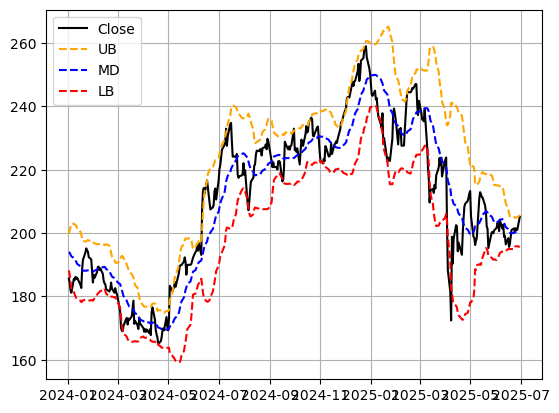

In [20]:
import matplotlib.pyplot as plt

df2 = df[df.index.year >= 2024]

plt.plot(df2.index, df2['Close'], color = 'black')
plt.plot(df2.index, df2['UpperBand'], color = 'orange', linestyle = "--")
plt.plot(df2.index, df2['MiddleBand'], color = 'blue', linestyle = "--")
plt.plot(df2.index, df2['LowerBand'], color = 'red', linestyle = "--")

plt.grid()
plt.legend(['Close', 'UB', 'MD', 'LB'])
plt.show()

3. 단기 트레이딩 관점에서 더 빠른 신호를 얻기 위해 '카카오(035720)'의 2023년 이후 데이터에 10일 기간의 볼린저 밴드를 계산하여 추가하세요.(MiddleBand_10, UpperBand_10, LowerBand_10)
* 기존 20일 밴드와 새로 만든 10일 밴드를 하나의 차트에 함께 그려 비교해 보세요.

In [3]:
df = fdr.DataReader("035720")
df = df[df.index.year >= 2023]

window = 20
std = 2

df["MiddleBand"] = df["Close"].rolling(window).mean() 
df["Std"] = df["Close"].rolling(window).std()
df["UpperBand"] = df["MiddleBand"] + df["Std"] * 2
df["LowerBand"] = df["MiddleBand"] - df["Std"] * 2

In [4]:
window = 10
std = 2

df["MiddleBand_10"] = df["Close"].rolling(window).mean() 
df["Std_10"] = df["Close"].rolling(window).std()
df["UpperBand_10"] = df["MiddleBand_10"] + df["Std_10"] * 2
df["LowerBand_10"] = df["MiddleBand_10"] - df["Std_10"] * 2
df.tail(5)

,Open,High,Low,Close,Volume,Change,MiddleBand,Std,UpperBand,LowerBand,MiddleBand_10,Std_10,UpperBand_10,LowerBand_10
Date,,,,,,,,,,,,,,
2025-06-30,61200,62000,59500,60000,4067265,-0.014778,55257.5,9101.175098,73459.850195,37055.149805,62540.0,6093.566735,74727.133470,50352.866530
2025-07-01,59900,63400,59300,60100,4862065,0.001667,56127.5,8658.483443,73444.466885,38810.533115,63370.0,4920.490039,73210.980078,53529.019922
2025-07-02,61000,61300,58100,58700,2974555,-0.023295,56905.0,8112.788799,73130.577599,40679.422401,63720.0,4368.269426,72456.538852,54983.461148
2025-07-03,59200,61400,58800,59500,3330017,0.013629,57800.0,7280.109889,72360.219779,43239.780221,63630.0,4452.727005,72535.454009,54724.545991
2025-07-04,60000,60400,58700,58800,769283,-0.011765,58525.0,6550.361581,71625.723162,45424.276838,62850.0,4556.619117,71963.238234,53736.761766


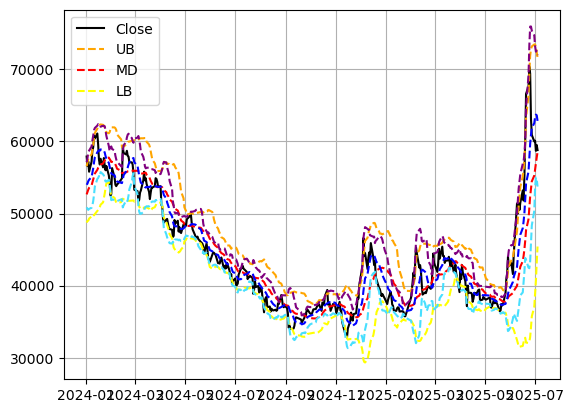

In [7]:
import matplotlib.pyplot as plt

df2 = df[df.index.year >= 2024]

plt.plot(df2.index, df2['Close'], color = 'black')

plt.plot(df2.index, df2['UpperBand'], color = 'orange', linestyle = "--")
plt.plot(df2.index, df2['MiddleBand'], color = 'red', linestyle = "--")
plt.plot(df2.index, df2['LowerBand'], color = 'yellow', linestyle = "--")

plt.plot(df2.index, df2['UpperBand_10'], color = 'purple', linestyle = "--")
plt.plot(df2.index, df2['MiddleBand_10'], color = 'blue', linestyle = "--")
plt.plot(df2.index, df2['LowerBand_10'], color = '#48dffe', linestyle = "--")

plt.grid()
plt.legend(['Close', 'UB', 'MD', 'LB'])
plt.show()

4. 강의에서 사용한 BBandStrategy를 이용하여 미국 S&P 500 지수('US500')에 대한 백테스팅을 실행하세요. 초기 자본은 50,000달러, 수수료는 0.1%로 설정하고, 기간은 2020년부터 현재까지로 합니다. 백테스팅 결과를 출력하고 해석하세요.

In [29]:
df = fdr.DataReader("US500", "2020")

bt = Backtest(df, BBandStrategy, cash = 50000, commission=0.001)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/1364 [00:00<?, ?bar/s]

Start                     2019-12-31 00:00:00
End                       2025-07-03 00:00:00
Duration                   2011 days 00:00:00
Exposure Time [%]                    45.23121
Equity Final [$]                  58109.88356
Equity Peak [$]                   58109.88356
Commissions [$]                    2340.44547
Return [%]                           16.21977
Buy & Hold Return [%]                 91.8296
Return (Ann.) [%]                     2.77471
Volatility (Ann.) [%]                14.93426
CAGR [%]                              1.90143
Sharpe Ratio                          0.18579
Sortino Ratio                         0.25708
Calmar Ratio                          0.11033
Alpha [%]                           -28.64255
Beta                                  0.48854
Max. Drawdown [%]                   -25.14836
Avg. Drawdown [%]                    -6.10175
Max. Drawdown Duration     1044 days 00:00:00
Avg. Drawdown Duration      142 days 00:00:00
# Trades                          